In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.24


Импорт необходимых модулей

In [2]:
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl

Расчет сепарации газа на приеме насоса

In [3]:
## Физико-химические свойства флюида PVT
gamma_gas_ = 0.9 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.875 # удельная плотность нефти, по воде;
gamma_wat_ = 1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 120 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
fw_ = 1 # объемная обводненность, %;
## Данные по скважине
Dcas_ = 130 # диаметр эксплуатационной колонны, мм;
Dintake_ = 100 # диаметр приемной сетки, мм;
Pintake_ = 30 # давление сепарации, атм;
Tintake_ = 80 # температура сепарации, С;
PVT_str_ = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, Tres_, Bob_, muob_)

Расчет зависимости коэффициента сепарации от дебита

In [4]:
Q_ar = np.arange(1, 241, 10) #
t_list, ksep_nat_list, ksep_nat_dcas_list, gas_frac_list, ksep_gassep_list, ksep_total_list = [], [], [], [], [], []
cf_dcas_ = 0.8 # коэффициент эксплуатационной колонны;
gassep_type = 5 #
for q in Q_ar:
    t_list.append(80)
    ksep_nat = UniflocVBA.MF_ksep_natural_d(q, fw_, Pintake_, Tintake_, Dintake_, Dcas_, PVT_str_)
    ksep_nat_list.append(ksep_nat) 
    ksep_nat_dcas = UniflocVBA.MF_ksep_natural_d(q, fw_, Pintake_, Tintake_, Dintake_, Dcas_*cf_dcas_, PVT_str_)
    ksep_nat_dcas_list.append(ksep_nat_dcas)
    gas_frac = UniflocVBA.MF_gas_fraction_d(Pintake_, Tintake_, 0, PVT_str_)*(1-ksep_nat_dcas)
    gas_frac_list.append(gas_frac)
    ksep_gassep = UniflocVBA.ESP_ksep_gasseparator_d(gassep_type, gas_frac, q)
    ksep_gassep_list.append(ksep_gassep)
    ksep_total = UniflocVBA.MF_ksep_total_d(ksep_nat, ksep_gassep)
    ksep_total_list.append(ksep_total)

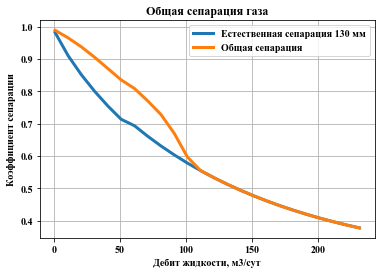

In [5]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

ys = [ksep_nat_list, ksep_total_list]
for i in range(2):
    plt.grid(True)
    plt.title('Общая сепарация газа', color='black', family='fantasy')
    plt.ylabel('Коэффициент сепарации', color='black', family='fantasy')
    plt.xlabel('Дебит жидкости, м3/сут', color='black', family='fantasy')
    plt.plot(Q_ar, ys[i], linewidth=3)
plt.legend(('Естественная сепарация 130 мм','Общая сепарация')) 
plt.show()

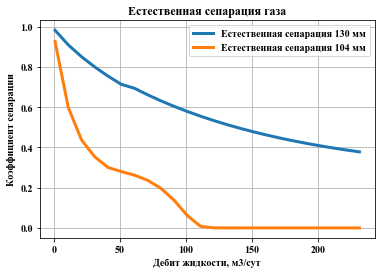

In [6]:
ys = [ksep_nat_list, ksep_nat_dcas_list]
for i in range(2):
    plt.grid(True)
    plt.title('Естественная сепарация газа', color='black', family='fantasy')
    plt.ylabel('Коэффициент сепарации', color='black', family='fantasy')
    plt.xlabel('Дебит жидкости, м3/сут', color='black', family='fantasy')
    plt.plot(Q_ar, ys[i], linewidth=3)
plt.legend(('Естественная сепарация 130 мм','Естественная сепарация 104 мм')) 
plt.show()